In [38]:
import numpy as np
import pandas as pd
import emoji
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Embedding

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical

In [39]:
data = pd.read_csv('emoji_data.csv', header = None)
data.head()


,0,1
0,maggie is so tasty,4
1,work is horrible,3
2,I am upset,3
3,throw the ball,1
4,Good joke,2


In [40]:
data=data.dropna()

In [41]:
emoji_dict = {
    0: ":red_heart:",
    1: ":baseball:",
    2: ":grinning_face_with_big_eyes:",
    3: ":disappointed_face:",
    4: ":fork_and_knife_with_plate:"
}

def label_to_emoji(label):
    return emoji.emojize(emoji_dict[label])

In [42]:
X = data[0].values
Y = data[1].values
X=np.delete(X,29)
Y=np.delete(Y,29)

# Embeddings

In [43]:
file = open('glove.6B.100d.txt', 'r', encoding = 'utf8')
content = file.readlines()
file.close()

# content

In [44]:
embeddings = {}

for line in content:
    line = line.split()
    embeddings[line[0]] = np.array(line[1:], dtype = float)

In [45]:
def get_maxlen(data):
    maxlen = 0
    for sent in data:
        maxlen = max(maxlen, len(sent))
    return maxlen



In [46]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index

In [47]:
Xtokens = tokenizer.texts_to_sequences(X)


In [48]:
maxlen = get_maxlen(Xtokens)
print(maxlen)

10


In [49]:
Xtrain = pad_sequences(Xtokens, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [50]:
Ytrain = to_categorical(Y)

# Model

In [51]:
embed_size = 100
embedding_matrix = np.zeros((len(word2index)+1, embed_size))

for word, i in word2index.items():
    embed_vector = embeddings[word]
    embedding_matrix[i] = embed_vector

In [52]:
embedding_matrix

array([[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [-0.046539,  0.61966 ,  0.56647 , ..., -0.37616 , -0.032502,
         0.8062  ],
       [-0.49886 ,  0.76602 ,  0.89751 , ..., -0.41179 ,  0.40539 ,
         0.78504 ],
       ...,
       [-0.46263 ,  0.069864,  0.69095 , ..., -0.29174 ,  0.32041 ,
         0.21202 ],
       [ 0.073242,  0.11134 ,  0.62281 , ...,  0.53417 , -0.1646  ,
        -0.27516 ],
       [ 0.29019 ,  0.80497 ,  0.31187 , ..., -0.33603 ,  0.45998 ,
        -0.11278 ]])

In [53]:
model = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
             ),
    
    LSTM(units = 16, return_sequences = True),
    LSTM(units = 4),
    Dense(5, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
history=model.fit(Xtrain, Ytrain, epochs = 100)

Epoch 1/100
6/6 [==============================] - 13s 16ms/step - loss: 1.5617 - accuracy: 0.2418
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 1.5377 - accuracy: 0.2967
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 1.5253 - accuracy: 0.2967
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 1.5150 - accuracy: 0.3187
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 1.5024 - accuracy: 0.3407
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 1.4885 - accuracy: 0.3901
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 1.4752 - accuracy: 0.4011
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 1.4541 - accuracy: 0.4121
Epoch 9/100
6/6 [==============================] - 0s 16ms/step - loss: 1.4325 - accuracy: 0.4505
Epoch 10/100
6/6 [==============================] - 0s 14ms/step - loss: 1.4082 - accuracy: 0.4560
Epoch 11/100
6/6 [

6/6 [==============================] - 0s 15ms/step - loss: 0.3769 - accuracy: 0.9396
Epoch 84/100
6/6 [==============================] - 0s 16ms/step - loss: 0.3745 - accuracy: 0.9396
Epoch 85/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3720 - accuracy: 0.9396
Epoch 86/100
6/6 [==============================] - 0s 16ms/step - loss: 0.3696 - accuracy: 0.9396
Epoch 87/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3672 - accuracy: 0.9396
Epoch 88/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3647 - accuracy: 0.9396
Epoch 89/100
6/6 [==============================] - 0s 16ms/step - loss: 0.3625 - accuracy: 0.9396
Epoch 90/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3601 - accuracy: 0.9396
Epoch 91/100
6/6 [==============================] - 0s 17ms/step - loss: 0.3580 - accuracy: 0.9396
Epoch 92/100
6/6 [==============================] - 0s 19ms/step - loss: 0.3559 - accuracy: 0.9396
Epoch 93/100
6/6 [=====

In [55]:
model.save('mew.h5')

In [31]:
test = ["I feel very bad"]

test_seq = tokenizer.texts_to_sequences(test)
Xtest = pad_sequences(test_seq, maxlen = maxlen, padding = 'post', truncating = 'post')

y_pred = model.predict(Xtest)
y_pred = np.argmax(y_pred, axis = 1)

for i in range(len(test)):
    print(test[i], label_to_emoji(y_pred[i]))

1/1 [==============================] - 6s 6s/step
I feel very bad 😞


In [34]:
import tkinter
from tkinter import messagebox

In [36]:
def check(*args):
    
    test = [str(e1.get())]

    test_seq = tokenizer.texts_to_sequences(test)
    Xtest = pad_sequences(test_seq, maxlen = maxlen, padding = 'post', truncating = 'post')

    y_pred = model.predict(Xtest)
    y_pred = np.argmax(y_pred, axis = 1)

    for i in range(len(test)):
        outtext=test[i]+label_to_emoji(y_pred[i])
    messagebox.showinfo("Alert",outtext)

In [37]:
root=tkinter.Tk()
root.geometry("200x200")
e1=tkinter.Entry(root)
e1.grid(row=1,column=3)
b1=tkinter.Button(root,command=check,text="press")
b1.grid(row=2,column=3)
lab1=tkinter.Label(root)
lab1.grid(row=3,column=1)

root.mainloop()

1/1 [==============================] - 2s 2s/step


KeyboardInterrupt: 

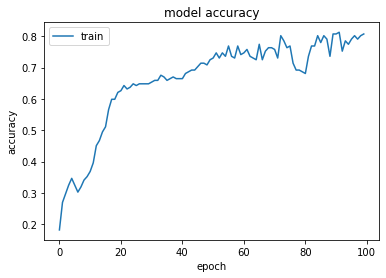

In [22]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

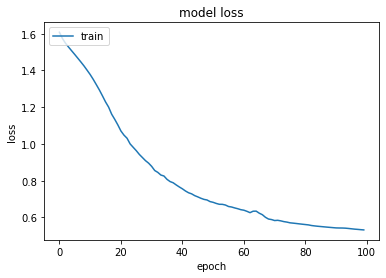

In [23]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
import flask
from flask import render_template,request,Flask

In [6]:
app=Flask(__name__)

In [8]:
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/submit', methods=['POST'])
def submit():
    test = request.form['entry']

    test_seq = tokenizer.texts_to_sequences(test)
    Xtest = pad_sequences(test_seq, maxlen = maxlen, padding = 'post', truncating = 'post')

    y_pred = model.predict(Xtest)
    y_pred = np.argmax(y_pred, axis = 1)

    for i in range(len(test)):
        outtext=test[i]+label_to_emoji(y_pred[i])
    return render_template('result.html',outtext=outtext)

if __name__ == '__main__':
    app.run(debug=True)

AssertionError: View function mapping is overwriting an existing endpoint function: index